**Deep Learning - Redes Recorrentes**

> 12/04/2024




### Pré-processamento - Organização dos dados
- Remoção das colunas que não serão utilizadas;
- Preenchimento dos dados faltantes:
    - Próximo valor válido, para manter o padrão da série.
- Remoção de valores negativos:
    - Próximo valor válido, para manter o padrão da série.

### Pré-processamento - Preparação para treino
- *Shuffle das séries*;
- Separação dos dados de treino/validação/teste:
    - 60:20:20 das séries
- *Shuffle dos elementos de treino*;
- Normalização dos dados:
    - Normalização dos conjuntos de dados a partir dos dados de treino.
    - Normalização MinMax (Valores entre 0 e 1).

### Construção do Modelo
- Construção da RNN

### 

Defina um grupo entre 4 ou 5 alunos, e com base no código pred_recorrente.ipynb, siga os seguintes passos:

- Liste os nomes de cada integrante do grupo.

- Crie uma versão do código pred_recorrente.ipynb disponibilizado no colab e disponibilize o link do mesmo para acesso público. Compartilhe, nesse item, o link do código.

- Altere o código para que o mesmo receba a coleção e faça a divisão da coleção entre treino (60%), validação (20%) e teste (20%). Assuma que as 85 séries (correspondentes aos 85 animais) são independentes e identicamente distribuídas.

- Apresente a curva de Training Loss vs Validation Loss e sua interpretação.

- Com a janela de tamanho 20, descreva o efeito de reduzir o número de neurônios da SimpleRNN de 25 para 2.

- Descreva o efeito de mudar a janela do RNN de tamanho 20 para 50 

- Descreva o efeito de mudar a janela do RNN de tamanho 20 para 5 

In [91]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 1000, 'display.width', 1000, 'display.max_rows',50)

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [92]:
sns.set(style="darkgrid", font_scale=1.5)

In [93]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Lendo o CSV e visualizando os dados. Como se tratam de dados temporais, utilizarmos a coluna "timestamp" como índice.

In [94]:
df_view = pd.read_csv("milk.csv", parse_dates=["Date"], index_col="Date")
df = pd.read_csv("milk.csv", parse_dates=["Date"])
print(df_view.shape)

(25925, 9)


In [95]:
df_view.head()

,AnEar,lactation,dim,milk_production,MilkShif,Cond,Dur,Peak,dim2
Date,,,,,,,,,
2023-01-09,123,4,1,11.5,11.50,5.420,276.0,6.7,1
2023-01-10,123,4,2,48.4,24.20,4.945,384.0,15.0,2
2023-01-11,123,4,3,66.4,33.20,5.060,672.0,15.5,3
2023-01-12,123,4,4,57.1,28.55,4.940,354.0,16.4,4
2023-01-13,123,4,5,78.5,39.25,5.055,396.0,17.0,5


In [96]:
df.head()

,AnEar,Date,lactation,dim,milk_production,MilkShif,Cond,Dur,Peak,dim2
0,123,2023-01-09,4,1,11.5,11.50,5.420,276.0,6.7,1
1,123,2023-01-10,4,2,48.4,24.20,4.945,384.0,15.0,2
2,123,2023-01-11,4,3,66.4,33.20,5.060,672.0,15.5,3
3,123,2023-01-12,4,4,57.1,28.55,4.940,354.0,16.4,4
4,123,2023-01-13,4,5,78.5,39.25,5.055,396.0,17.0,5


Seja o conjunto de dados milk.csv que representa séries temporais da produção leiteira em 305 dias sobre 85 animais. Nessa coleção, as colunas de interesse para essa atividade são:


- AnEar: Código do animal

- milk_production: produção diária do animal 

- Date: Dia da produção.

In [97]:
#Removendo as colunas conforme enunciado

drop_columns = ['lactation', 'dim', 'MilkShif', 'Cond', 'Dur', 'Peak', 'dim2']

df_view.drop(drop_columns, axis=1, inplace=True)
df.drop(drop_columns, axis=1, inplace=True)
df.drop(df[df['AnEar']==8732].index, axis=0, inplace=True)


print(f'Resumo do dataframe: \n{df.describe()}')
print(f'\n---------------------------------------------------- \n')
#Verificando dados faltanes (NaN) no dataframe
print(f'Dados Faltantes: \n{df_view.isnull().sum()}')

Resumo do dataframe: 
              AnEar                           Date  milk_production
count  25620.000000                          25620     25590.000000
mean    7701.988095  2023-07-28 14:46:35.690866688       101.803451
min      123.000000            2023-01-04 00:00:00        -1.600000
25%     8391.000000            2023-05-13 00:00:00        83.800000
50%     9197.500000            2023-07-29 00:00:00       101.000000
75%     9892.500000            2023-10-13 00:00:00       120.000000
max     9977.000000            2024-02-29 00:00:00       202.000000
std     3315.974116                            NaN        25.624105

---------------------------------------------------- 

Dados Faltantes: 
AnEar               0
milk_production    76
dtype: int64


Verificando valores negativos.

In [98]:
df_view[df_view['milk_production']<0]

,AnEar,milk_production
Date,,
2023-09-05,9549,-1.6


In [99]:
df[df['AnEar']==8732].index

Index([], dtype='int64')

In [100]:
df['milk_production'].loc[df['milk_production']<0] = 0

In [101]:
print(f'Resumo do dataframe: \n{df.describe()}')
print(f'\n---------------------------------------------------- \n')

Resumo do dataframe: 
              AnEar                           Date  milk_production
count  25620.000000                          25620     25590.000000
mean    7701.988095  2023-07-28 14:46:35.690866688       101.803513
min      123.000000            2023-01-04 00:00:00         0.000000
25%     8391.000000            2023-05-13 00:00:00        83.800000
50%     9197.500000            2023-07-29 00:00:00       101.000000
75%     9892.500000            2023-10-13 00:00:00       120.000000
max     9977.000000            2024-02-29 00:00:00       202.000000
std     3315.974116                            NaN        25.623855

---------------------------------------------------- 



In [102]:
print(df.groupby('AnEar').size().to_frame().T)

AnEar  123   1009  1017  1209  1218  1242  1243  1275  1280  1305  1327  1329  1341  1362  1368  1387  1393  7761  8064  8334  8385  8393  8434  8435  8438  8509  8581  8667  8723  8741  8932  8947  8996  9005  9066  9069  9078  9081  9090  9101  9149  9188  9207  9284  9346  9363  9388  9389  9431  9463  9464  9478  9487  9488  9525  9529  9549  9558  9562  9583  9885  9891  9892  9894  9908  9909  9910  9917  9918  9920  9922  9926  9928  9929  9933  9939  9943  9944  9946  9951  9961  9967  9968  9977
0       305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   305   30

In [103]:
print('Quantidade de séries únicas (Número de vacas):')
print(df.groupby('AnEar').size().shape[0])

print(f'\nElementos com dados faltantes:')
print(df[df['milk_production'].isnull()].groupby('AnEar').size().shape[0])

print(f'\nVisualização dos elementos:')
print(df[df['milk_production'].isnull()].groupby('AnEar').size().to_frame().T)

print(f'\nQuantidade de dias com dados faltantes:')
print(df[df['milk_production'].isnull()].groupby('Date').size().shape[0])

Quantidade de séries únicas (Número de vacas):
84

Elementos com dados faltantes:
30

Visualização dos elementos:
AnEar  7761  8064  8385  8393  8435  8667  8723  8741  8932  8996  9069  9090  9101  9346  9363  9389  9431  9478  9487  9525  9549  9583  9891  9909  9918  9922  9926  9928  9939  9968
0         1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1     1

Quantidade de dias com dados faltantes:
26


In [104]:
df = df.fillna(method='bfill')

In [105]:
vacas = list(df.groupby('AnEar').size().index)
vacas_faltantes = list(df[df['milk_production'].isnull()].groupby('AnEar').size().index)

Organizando as séries:

In [106]:
dados = np.array(df)
df = pd.DataFrame(data=dados.T,
                  columns=pd.MultiIndex.from_frame(df.iloc[:,:2]))
df.drop([0, 1], axis=0, inplace=True)
df = df.rename(index={2 : 'milk_production'})

[Text(0.5, 0, 'Datas'),
 Text(0, 0.5, 'Leite produzido (lb)'),
 Text(0.5, 1.0, 'Produção de Leite')]

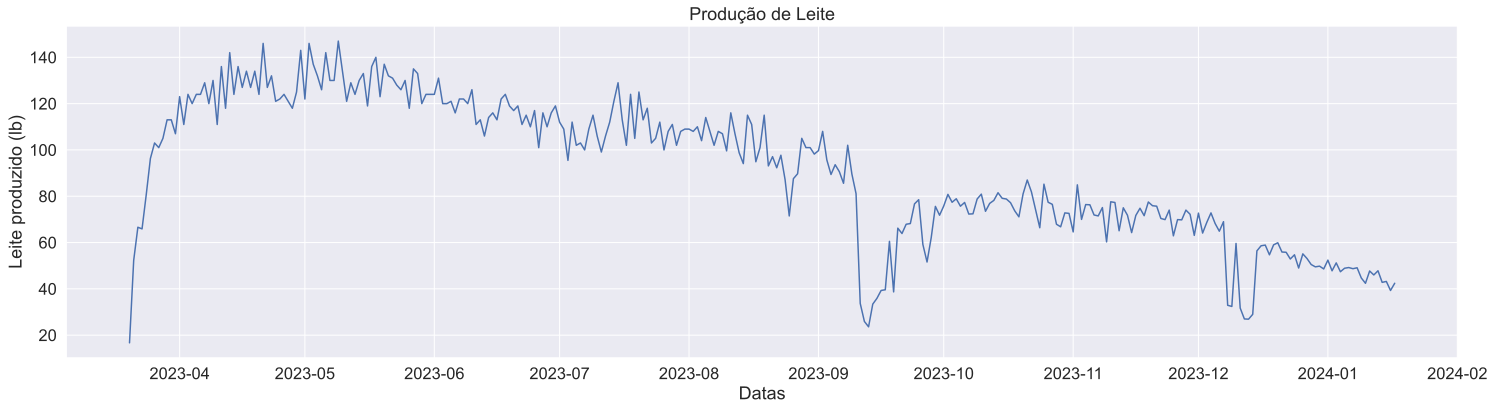

In [107]:
#df[df['AnEar']==7761]
problem = 7761

plt.figure(figsize=(25,6))
ax = sns.lineplot(x=df_view[df_view['AnEar']==problem].index,
                  y="milk_production",
                  data=df_view[df_view['AnEar']==problem]
                  )

ax.set(xlabel='Datas', ylabel='Leite produzido (lb)', title='Produção de Leite')

In [108]:
import datetime

df_view[df_view['AnEar']==8732].index[1]+datetime.timedelta(days=300)

Timestamp('2023-10-30 00:00:00')

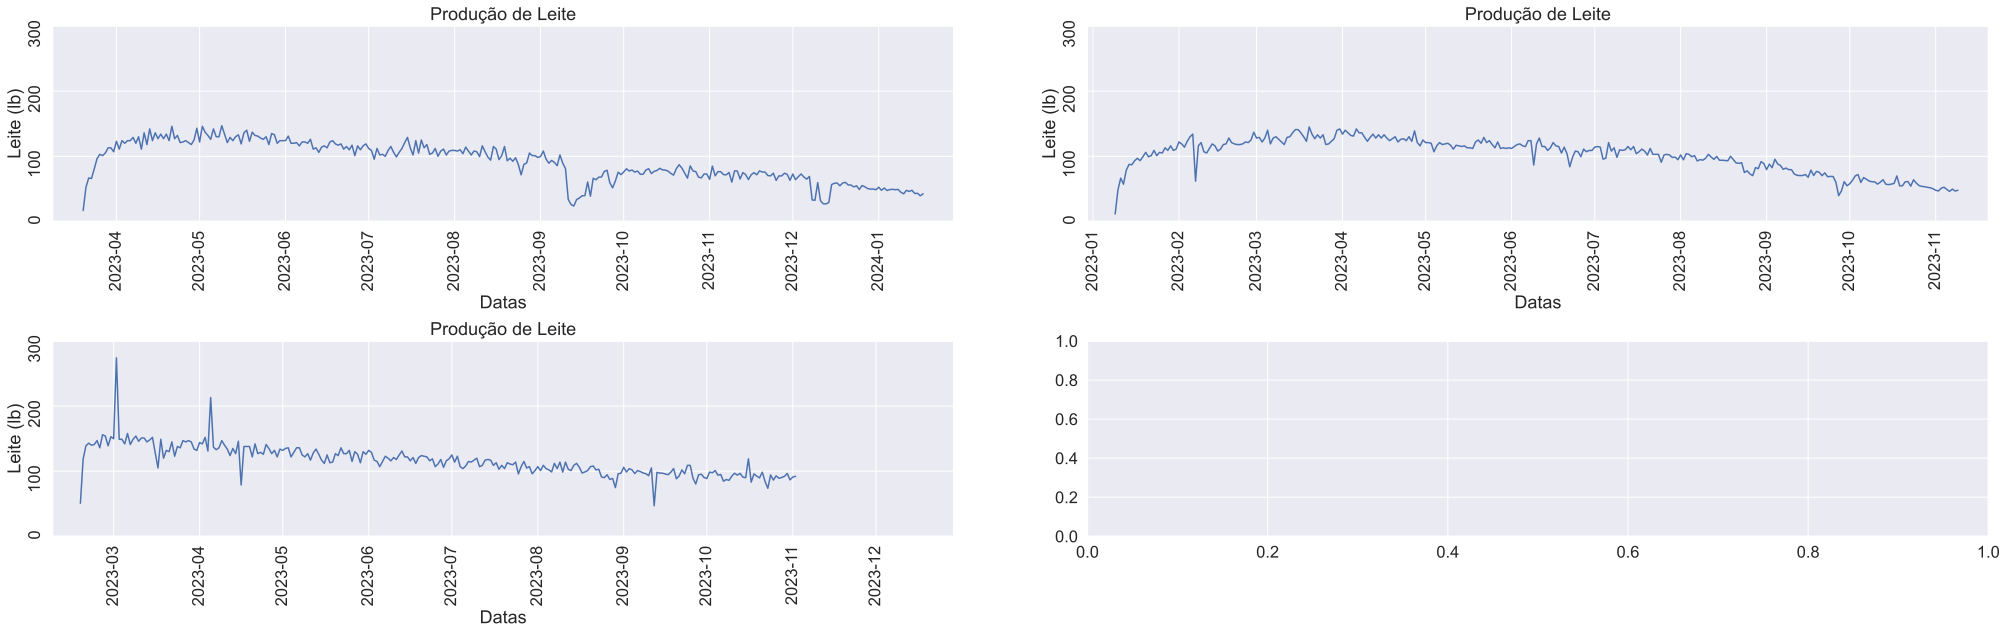

In [109]:
fig, ax = plt.subplots(2, 2, figsize=(30, 10))
fig.tight_layout(pad=5)
sns.lineplot(x=df_view[df_view['AnEar']==problem].index,
             y="milk_production",
             data=df_view[df_view['AnEar']==problem],
             ax=ax[0,0],
             )

sns.lineplot(x=df_view[df_view['AnEar']==123].index,
             y="milk_production",
             data=df_view[df_view['AnEar']==123],
             ax=ax[0,1],
             )

sns.lineplot(x=df_view[df_view['AnEar']==8732].index,
             y="milk_production",
             data=df_view[df_view['AnEar']==8732],
             ax=ax[1,0],
             )

ax[0,0].set(xlabel='Datas',
            ylabel = 'Leite (lb)',
            title='Produção de Leite',
            xlim=(df_view[df_view['AnEar']==problem].index[0]+datetime.timedelta(days=-10), df_view[df_view['AnEar']==problem].index[0]+datetime.timedelta(days=315)),
            ylim=(0, 300))
ax[0,0].tick_params(labelrotation=90)

ax[0,1].set(xlabel='Datas',
            ylabel = 'Leite (lb)',
            title='Produção de Leite',
            xlim=(df_view[df_view['AnEar']==123].index[0]+datetime.timedelta(days=-10), df_view[df_view['AnEar']==123].index[0]+datetime.timedelta(days=315)),
            ylim=(0, 300))
ax[0,1].tick_params(labelrotation=90)

ax[1,0].set(xlabel='Datas',
            ylabel = 'Leite (lb)',
            title='Produção de Leite',
            xlim=(df_view[df_view['AnEar']==8732].index[46]+datetime.timedelta(days=-10), df_view[df_view['AnEar']==8732].index[46]+datetime.timedelta(days=315)),
            ylim=(0, 300))
ax[1,0].tick_params(labelrotation=90)

Vamos verificar os dados temporais plotados.

In [110]:
#plt.figure(figsize=(25,6))
#sns.lineplot(x=df.index, y=df['milk_production'], data=df).set_title("Produção de Leite")

Amortizando a visualização...

```
df.resample('10D').mean().plot(figsize=(25,6))
plt.figtext(.5,0.9,"sub-amostragem para intervalos de 10 dias", fontsize=20, ha='center')
```

# Model

Redes recorrentes são modelos poderosos para tratar sequências, pois eles mantêm o estado interno sobre as variações anteriores. Tais redes requerem uma matriz 3d com formato: (num_exemplos_treino, timesteps, input_dim).

Vamos construir um modelo usando timesteps=50 valores anteriores para prever o próximo valor. Como estamos usando apenas uma variável, input_dim=1.

## Pré-processamento dos dados
Reorganizando os dados de forma que uma sequencia de valores dos 50 dias anteriores seja usada para prever o próximo dia. Os valores também serão normalizados entre 0 e 1.

In [111]:
data = df.iloc[:, :]
#data=df[['close', 'high', 'low']].to_numpy()

In [112]:
vacas = list(data.loc['milk_production'].index.unique(level='AnEar'))

In [113]:
X = []
y = []
length = 20
"""
for vaca in vacas:
    for i in range(data[vaca].shape[1]-length):
        x_value = data[vaca].iloc[:, i:i+length]
        y_value = data[vaca].iloc[:, i+length]

        X.append(x_value)
        y.append(y_value)
"""

for vaca in vacas:
    x_value = data[vaca]
    X.append(x_value)

In [114]:
print(len(X[0].loc['milk_production']))
print(len(X))
#print(len(y))

305
84


In [115]:
print(X[0].loc['milk_production'][length-1])
#print(data[123].loc['milk_production'][length-1])

109.0


o último ponto do exemplo de treino 1 (hist\[1\]) é a rotulação do exemplo de treino 0 e o elemento length do dado original. double check:

In [116]:
print(X[1].loc['milk_production'][length-1])
print(data[123].loc['milk_production'][length])
#print(y[0].loc['milk_production'])

114.0
116.0


In [117]:
print(type(X), type(y))
#convertendo de lista para array
X = np.array(X)
y = np.array(y)

print(type(X), type(y))
print(X.shape, y.shape)

X = np.squeeze(X)
y = y.reshape(-1,1)

print(X.shape, y.shape)

<class 'list'> <class 'list'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(84, 1, 305) (0,)
(84, 305) (0, 1)


### 3 - Altere o código para que o mesmo receba a coleção e faça a divisão da coleção entre treino (60%), validação (20%) e teste (20%). Assuma que as 85 séries (correspondentes aos 85 animais) são independentes e identicamente distribuídas.

In [118]:
"""
hist1, target1 = resample(hist[0:3],
                        target[0:3],
                        n_samples=3,
                        random_state=0)
                     

X, y = shuffle(hist,
               target,
               #n_samples=2,
               random_state=0)
"""

#resample - data augmentation

from sklearn.utils import resample
from sklearn.utils import shuffle

```
from sklearn.model_selection import train_test_split

X_pretrain, X_test, y_pretrain, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_pretrain, y_pretrain, test_size=0.25, random_state=0)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)
```

```
#Forma correta de normalizar com MinMax (fazendo a divisão entre treino e validação)

valued=int(hist.shape[0]*9/10)

X_train = hist[:valued,:]
X_val = hist[valued:,:]

y_train = target[:valued,:]
y_val = target[valued:,:]
```

In [119]:
#treino-validacao-teste : 60:20:20

treino = 0.6*(X.shape[1]-length)
valida = 0.2*(X.shape[1]-length)

X_train = []
X_val = []
X_test = []

y_train = []
y_val = []
y_test = []


for vaca in range(X.shape[0]):
    for i in range(X.shape[1]-length):

        x_value = X[vaca][i:i+length]
        y_value = X[vaca][i+length]
            
        if i < treino:
            X_train.append(x_value)
            y_train.append(y_value)
        elif i < treino+valida:
            X_val.append(x_value)
            y_val.append(y_value)
        else:
            X_test.append(x_value)
            y_test.append(y_value)

X_train = np.array(X_train).astype(float)
y_train = np.array(y_train).astype(float).reshape(-1,1)

X_val = np.array(X_val).astype(float)
y_val = np.array(y_val).astype(float).reshape(-1,1)

X_test = np.array(X_test).astype(float)
y_test = np.array(y_test).astype(float).reshape(-1,1)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(14364, 20) (14364, 1)
(4788, 20) (4788, 1)
(4788, 20) (4788, 1)


In [120]:
#Forma correta de normalizar com MinMax (fazendo a divisão entre treino e validação)

##Normalizando...
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

X_train = X_train.reshape((len(X_train), length, 1)) #array 3d (entrada do LSTM). A terceira dimensão tem apenas 1 feature.
X_val = X_val.reshape((len(X_val), length, 1))
X_test = X_test.reshape((len(X_test), length, 1))

sc.fit(y_train)
y_train = sc.transform(y_train)
y_val = sc.transform(y_val)
y_test = sc.transform(y_test)

## Construindo a rede neural

In [121]:
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint


from keras.callbacks import BackupAndRestore


In [122]:
model = Sequential()

#model.add(SimpleRNN(25, return_sequences=True, input_shape=(length,1)))
model.add(SimpleRNN(25, input_shape=(length,1)))
model.summary()
model.add(Dense(1))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 25)                675       
                                                                 
Total params: 675
Trainable params: 675
Non-trainable params: 0
_________________________________________________________________


Criamos um modelo com 1 camada de RNN e 1 camada densa de saída. Compilando e treinando o método...

In [123]:
import os
def uniquify(path):
    filename, extension = os.path.splitext(path)
    counter = 1

    while os.path.exists(path):
        path = filename + "_" + str(counter) + extension
        counter += 1

    return path

In [124]:
path = './models/milk.weights.hdf5'

restore = BackupAndRestore(backup_dir="/tmp/backup")

save_model = ModelCheckpoint(filepath=path,
                             verbose=1,
                             save_best_only=True)

In [125]:
"""
checkpoint = ModelCheckpoint("best",
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='auto',
                             period=1)
"""
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])

In [126]:
"""
history = model.fit(X_train,
                    y_train,
                    epochs=30,
                    validation_data=(X_val, y_val),
                    batch_size=32,
                    callbacks=[checkpoint])
history = model.fit(X_train,
                    y_train,
                    epochs=30,
                    validation_data=(X_val, y_val),
                    batch_size=32)
"""
history = model.fit(x=X_train,
                    y=y_train,
                    epochs=30,
                    validation_data=(X_val, y_val),
                    batch_size=32,
                    callbacks=[restore, save_model])

Epoch 1/30
448/449 [============================>.] - ETA: 0s - loss: 0.0025 - mae: 0.0343
Epoch 1: val_loss improved from inf to 0.00165, saving model to ./models\milk.weights.hdf5
449/449 [==============================] - 10s 21ms/step - loss: 0.0025 - mae: 0.0343 - val_loss: 0.0017 - val_mae: 0.0280
Epoch 2/30
447/449 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0285
Epoch 2: val_loss improved from 0.00165 to 0.00156, saving model to ./models\milk.weights.hdf5
449/449 [==============================] - 10s 22ms/step - loss: 0.0017 - mae: 0.0285 - val_loss: 0.0016 - val_mae: 0.0273
Epoch 3/30
449/449 [==============================] - ETA: 0s - loss: 0.0016 - mae: 0.0282
Epoch 3: val_loss did not improve from 0.00156
449/449 [==============================] - 9s 21ms/step - loss: 0.0016 - mae: 0.0282 - val_loss: 0.0019 - val_mae: 0.0308
Epoch 4/30
448/449 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0284
Epoch 4: val_loss improved from 0.0


Vamos visualizar os erros de treino e validação:



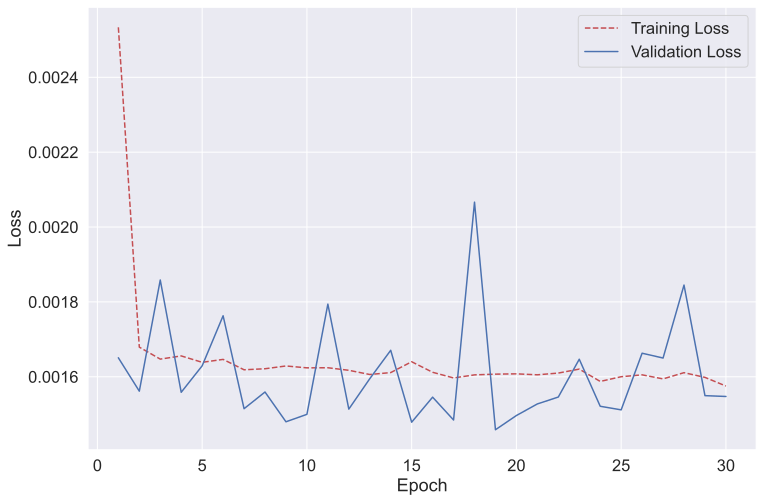

In [127]:
loss = history.history['loss']
val_loss=history.history['val_loss']
epoch_count = range(1, len(loss) + 1)
plt.figure(figsize=(12,8))
plt.plot(epoch_count, loss, 'r--')
plt.plot(epoch_count, val_loss,  )
plt.legend(['Training Loss', 'Validation Loss'])

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [128]:
from keras.models import load_model

fm_model = load_model(path)
fm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 25)                675       
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________


In [129]:
fm_model.load_weights(path)

Vamos fazer as predições:

In [134]:
pred = fm_model.predict(X_test)
#print(np.hstack((pred, y_val)))

150/150 [==============================] - 1s 4ms/step


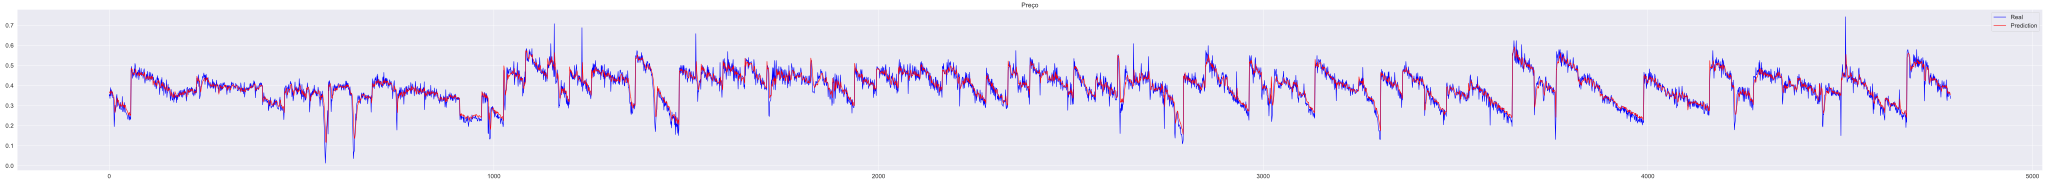

In [135]:
plt.figure(figsize=(100,8))
plt.plot(y_test, color='blue', label='Real')
plt.plot(pred, color='red', label='Prediction')
plt.title('Preço')
plt.legend()
plt.show()

O modelo parece estar bem ajustado. Vamos verificar o valor real (sem normalização):

In [136]:
pred_transformed = sc.inverse_transform(pred)
y_test_transformed = sc.inverse_transform(y_test)

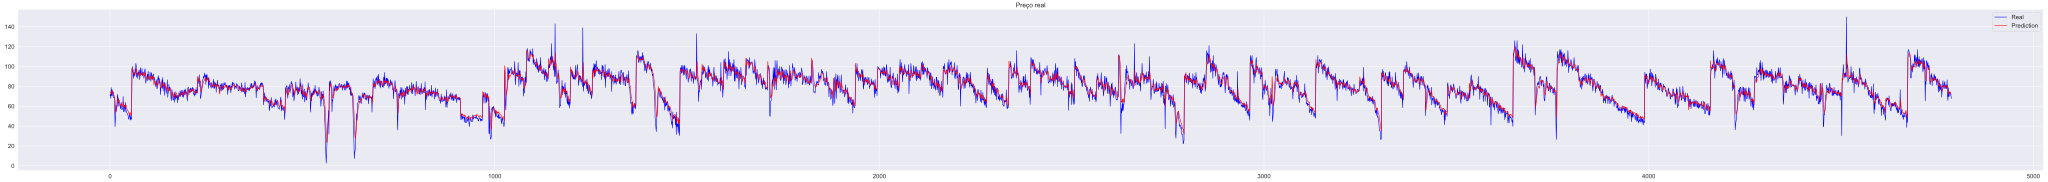

In [137]:
plt.figure(figsize=(100,8))
plt.plot(y_test_transformed, color='blue', label='Real')
plt.plot(pred_transformed, color='red', label='Prediction')
plt.title('Preço real')
plt.legend()
plt.show()